##Imports

In [ ]:
!pip install bing-image-downloader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import zipfile
import random
import shutil
from shutil import copyfile
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from google.colab import files

##Mount at Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Download Datasets

Gausah didownload ulang


Types of delicacies:
1. Mie goreng
2. Mie ayam
3. Nasi goreng
4. Bakso
5. Sate
6. Ayam goreng lalapan
7. Pecel
8. Bubur
9. Gado-gado
10. Nasi rendang
11. Capcay
12. Ikan goreng lalapan
13. Soto
14. Rawon
15. Nasi telur


In [ ]:
from bing_image_downloader import downloader
downloader.download('mie goreng', limit=100,  output_dir='/content/drive/MyDrive/dataset', adult_filter_off=True, force_replace=False, timeout=60, verbose=True)

In [ ]:
from bing_image_downloader import downloader
downloader.download('mie ayam', limit=100,  output_dir='/content/drive/MyDrive/dataset', adult_filter_off=True, force_replace=False, timeout=60, verbose=True)

In [ ]:
from bing_image_downloader import downloader
downloader.download('nasi goreng', limit=100,  output_dir='/content/drive/MyDrive/dataset', adult_filter_off=True, force_replace=False, timeout=60, verbose=True)

In [ ]:
from bing_image_downloader import downloader
downloader.download('bakso', limit=100,  output_dir='/content/drive/MyDrive/dataset', adult_filter_off=True, force_replace=False, timeout=60, verbose=True)

In [ ]:
from bing_image_downloader import downloader
downloader.download('sate ayam', limit=100,  output_dir='/content/drive/MyDrive/dataset', adult_filter_off=True, force_replace=False, timeout=60, verbose=True)

In [ ]:
from bing_image_downloader import downloader
downloader.download('ayam goreng lalapan', limit=100,  output_dir='/content/drive/MyDrive/dataset', adult_filter_off=True, force_replace=False, timeout=60, verbose=True)

In [ ]:
from bing_image_downloader import downloader
downloader.download('nasi pecel', limit=100,  output_dir='/content/drive/MyDrive/dataset', adult_filter_off=True, force_replace=False, timeout=60, verbose=True)

In [ ]:
from bing_image_downloader import downloader
downloader.download('bubur ayam', limit=100,  output_dir='/content/drive/MyDrive/dataset', adult_filter_off=True, force_replace=False, timeout=60, verbose=True)

In [ ]:
from bing_image_downloader import downloader
downloader.download('gado gado', limit=100,  output_dir='/content/drive/MyDrive/dataset', adult_filter_off=True, force_replace=False, timeout=60, verbose=True)

In [ ]:
from bing_image_downloader import downloader
downloader.download('nasi rendang', limit=100,  output_dir='/content/drive/MyDrive/dataset', adult_filter_off=True, force_replace=False, timeout=60, verbose=True)

In [ ]:
from bing_image_downloader import downloader
downloader.download('capcay', limit=100,  output_dir='/content/drive/MyDrive/dataset', adult_filter_off=True, force_replace=False, timeout=60, verbose=True)

In [ ]:
from bing_image_downloader import downloader
downloader.download('ikan goreng lalapan', limit=100,  output_dir='/content/drive/MyDrive/dataset', adult_filter_off=True, force_replace=False, timeout=60, verbose=True)

In [ ]:
from bing_image_downloader import downloader
downloader.download('soto ayam', limit=100,  output_dir='/content/drive/MyDrive/dataset', adult_filter_off=True, force_replace=False, timeout=60, verbose=True)

In [ ]:
from bing_image_downloader import downloader
downloader.download('nasi rawon', limit=100,  output_dir='/content/drive/MyDrive/dataset', adult_filter_off=True, force_replace=False, timeout=60, verbose=True)

In [ ]:
from bing_image_downloader import downloader
downloader.download('nasi telur', limit=100,  output_dir='/content/drive/MyDrive/dataset', adult_filter_off=True, force_replace=False, timeout=60, verbose=True)

##Data Preprocessing

In [ ]:
base_dir = "/content/drive/MyDrive/dataset"

In [ ]:
##Preprocessing
IMAGE_SIZE = 150
BATCH_SIZE = 64

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255.,
    rotation_range=40,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255.,
    validation_split=0.1)

train_datagen = train_datagen.flow_from_directory(
    base_dir, 
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='training')

test_datagen = test_datagen.flow_from_directory(
    base_dir, 
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='validation')

Found 1369 images belonging to 15 classes.
Found 152 images belonging to 15 classes.


##Train Model

Get pretrained model

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2023-05-31 07:43:29--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.201.128, 74.125.202.128, 74.125.69.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.201.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  76.2MB/s    in 1.1s    

2023-05-31 07:43:30 (76.2 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Set the weights file you downloaded into a variable
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

# Initialize the base model.
# Set the input shape and remove the dense layers.
pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

# Load the pre-trained weights you downloaded.
pre_trained_model.load_weights(local_weights_file)

# Freeze the weights of the layers.
for layer in pre_trained_model.layers:
  layer.trainable = False

In [ ]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                       

In [ ]:
# Choose `mixed_7` as the last layer of your base model
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


Create callback

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.999):
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True

Create final model

In [ ]:
##Model

# Note the input shape is the desired size of the image 300x300 with 3 bytes color
x = layers.Flatten()(last_output)
# 512 neuron hidden layer
x = tf.keras.layers.Dense(1024, activation = 'relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)  
# Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
x = tf.keras.layers.Dense(15, activation='softmax')(x)

model = Model(pre_trained_model.input, x) 

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    

In [ ]:
callbacks = myCallback()
history = model.fit(train_datagen, epochs=20, validation_data=test_datagen, callbacks=callbacks)

Epoch 1/20
22/22 [==============================] - 385s 17s/step - loss: 5.0318 - accuracy: 0.1907 - val_loss: 1.8651 - val_accuracy: 0.3947
Epoch 2/20
22/22 [==============================] - 41s 2s/step - loss: 1.6926 - accuracy: 0.4755 - val_loss: 1.5025 - val_accuracy: 0.5000
Epoch 3/20
22/22 [==============================] - 41s 2s/step - loss: 1.2928 - accuracy: 0.5953 - val_loss: 1.3352 - val_accuracy: 0.6053
Epoch 4/20
22/22 [==============================] - 41s 2s/step - loss: 1.0841 - accuracy: 0.6552 - val_loss: 1.2512 - val_accuracy: 0.6184
Epoch 5/20
22/22 [==============================] - 41s 2s/step - loss: 0.8652 - accuracy: 0.7407 - val_loss: 1.2109 - val_accuracy: 0.6053
Epoch 6/20
22/22 [==============================] - 41s 2s/step - loss: 0.6998 - accuracy: 0.7801 - val_loss: 1.2096 - val_accuracy: 0.5855
Epoch 7/20
22/22 [==============================] - 41s 2s/step - loss: 0.6179 - accuracy: 0.8123 - val_loss: 1.0823 - val_accuracy: 0.6579
Epoch 8/20
22/22 [

Plot accuracy

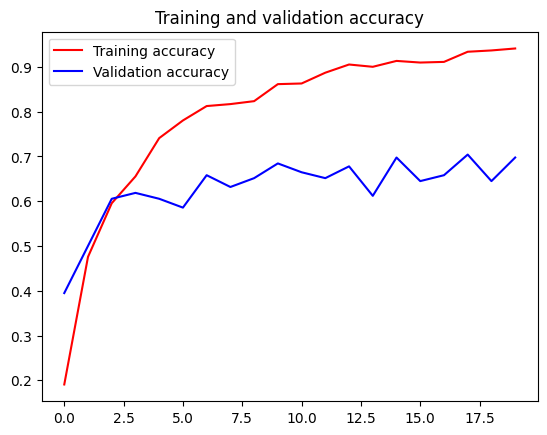

<Figure size 640x480 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

Plot Loss

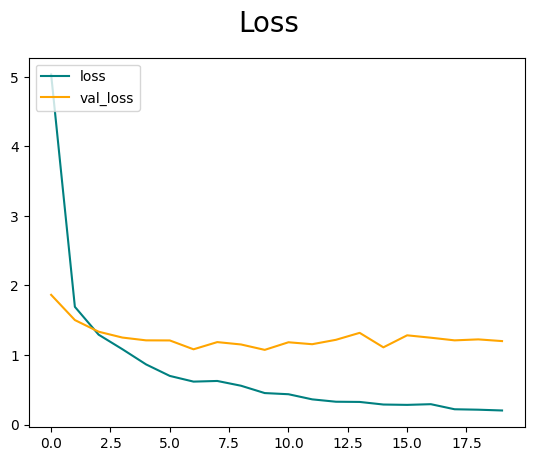

In [ ]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# New Section

In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np

# Mengupload gambar-gambar
uploaded_files = files.upload()

# Inisialisasi list untuk menyimpan hasil prediksi
predictions = []

# Looping untuk setiap file gambar yang diupload
for image_path in uploaded_files.keys():
    # Load gambar dan lakukan preprocessing
    img = image.load_img(image_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0

    # Prediksi kelas gambar
    predictions = model.predict(img_array)

    # Dictionary untuk mapping indeks kelas ke nama kelas
    class_names = train_datagen.class_indices
    # Mengambil indeks kelas dengan nilai probabilitas tertinggi
    predicted_class_index = np.argmax(predictions)
    
    # Mengambil nama kelas yang terkait dengan prediksi
    predicted_class = [k for k, v in class_names.items() if v == predicted_class_index][0]
    
    # Mengambil nilai probabilitas tertinggi
    predicted_prob = np.max(predictions)
    
    # Menampilkan nama file, prediksi kelas, dan nilai probabilitas
    print('File:', image_path)
    print('Predicted class:', predicted_class)
    print('Probability:', predicted_prob)
print()

Saving Image_38.jpg to Image_38 (1).jpg
1/1 [==============================] - 0s 24ms/step
File: Image_38.jpg
Predicted class: ayam goreng lalapan
Probability: 0.9943116



##Download final model

In [ ]:
export_dir = '/drive/MyDrive/model'
tf.saved_model.save(model, export_dir=export_dir)

In [ ]:
files.download(export_dir + '/saved_model.pb')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>